In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.head()

,Unnamed: 0,var_6m_price_var_diff
0,0,0.486180
1,1,-5.414956
2,2,0.042898
3,3,0.042097
4,4,0.067221


In [4]:
df.describe()

,Unnamed: 0,var_6m_price_var_diff
count,3998.000000,3998.000000
mean,1998.500000,-0.033065
std,1154.267517,0.957816
min,0.000000,-13.371493
25%,999.250000,0.042097
50%,1998.500000,0.044840
75%,2997.750000,0.067221
max,3997.000000,10.100911


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   int64  
 1   var_6m_price_var_diff  3998 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [6]:
df.dtypes

Unnamed: 0                 int64
var_6m_price_var_diff    float64
dtype: object

In [7]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

In [9]:
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

In [10]:
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [11]:
diff.count()

id                                 16096
offpeak_diff_dec_january_energy    16096
offpeak_diff_dec_january_power     16096
dtype: int64

In [12]:
d2 = df['churn']
d2.head()

KeyError: 'churn'

In [13]:
d2.count()

NameError: name 'd2' is not defined

In [14]:
x = diff.drop('id', axis=1)
x.head()

,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,-0.006192,0.162916
1,-0.004104,0.177779
2,0.050443,1.500000
3,-0.010018,0.162916
4,-0.003994,-0.000001


In [15]:
y = d2
y.head()

NameError: name 'd2' is not defined

In [16]:
if len(x)>len(y):
    x = x[:len(y)]
elif len(x)<len(y):
    y = y[:len(x)]

NameError: name 'y' is not defined

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2)

NameError: name 'x' is not defined

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg = LogisticRegression()

In [24]:
lg.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [25]:
y_pred = lg.predict(x_test)
y_pred

NameError: name 'x_test' is not defined

In [26]:
y_pred.mean()

NameError: name 'y_pred' is not defined

In [27]:
dp = pd.read_csv('price_data.csv')
dp.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [28]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [29]:
scaler = StandardScaler()
numerical_columns = dp.select_dtypes(include=['float64', 'int64']).columns
dp[numerical_columns] = scaler.fit_transform(dp[numerical_columns])

In [30]:
dp.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.413067,-1.094268,-0.840159,0.172349,-0.827207,-0.824587
1,038af19179925da21a25619c5a24b745,2015-02-01,0.413067,-1.094268,-0.840159,0.172349,-0.827207,-0.824587
2,038af19179925da21a25619c5a24b745,2015-03-01,0.413067,-1.094268,-0.840159,0.172349,-0.827207,-0.824587
3,038af19179925da21a25619c5a24b745,2015-04-01,0.343517,-1.094268,-0.840159,0.172349,-0.827207,-0.824587
4,038af19179925da21a25619c5a24b745,2015-05-01,0.343517,-1.094268,-0.840159,0.172349,-0.827207,-0.824587


In [31]:
dc = pd.read_csv('clean_data.csv')
dc.head()

,Unnamed: 0,var_6m_price_var_diff
0,0,0.486180
1,1,-5.414956
2,2,0.042898
3,3,0.042097
4,4,0.067221


In [32]:
dc['var_6m_price_var_diff']=dc['var_6m_price_off_peak_var']-dc['var_6m_price_peak_var']

KeyError: 'var_6m_price_off_peak_var'

In [33]:
dc['var_6m_price_var_diff'].to_csv('clean_data.csv')

In [34]:
dc

,Unnamed: 0,var_6m_price_var_diff
0,0,0.486180
1,1,-5.414956
2,2,0.042898
3,3,0.042097
4,4,0.067221
...,...,...
3993,3993,0.042898
3994,3994,0.061548
3995,3995,0.042097
3996,3996,0.041215


In [35]:
dc['var_6m_price_var_diff']

0       0.486180
1      -5.414956
2       0.042898
3       0.042097
4       0.067221
          ...   
3993    0.042898
3994    0.061548
3995    0.042097
3996    0.041215
3997    0.032153
Name: var_6m_price_var_diff, Length: 3998, dtype: float64

C:\Users\91854\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


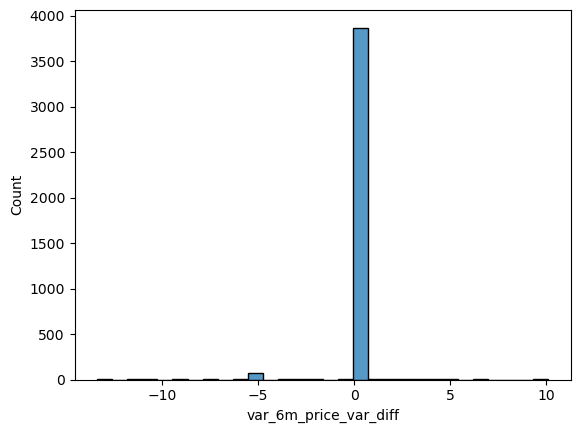

In [36]:
sns.histplot(dc['var_6m_price_var_diff'], bins=30)
plt.show()

In [39]:
import sweetviz as sv

In [40]:
report = sv.analyze(dc)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
